<a href="https://colab.research.google.com/github/2203A52132/DAUP-PROJECT/blob/main/daup_2132__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/startup_growth_investment_data.csv"
df = pd.read_csv(file_path)

# Display basic dataset information
print(df.info())

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB
None


,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [ ]:
# Drop rows with missing target values (if any)
df = df.dropna(subset=['Growth Rate (%)'])  # Change 'Target_Column' to the actual target variable

# Convert categorical columns to numerical if needed
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

# Ensure all columns are numeric
print(df.dtypes)


Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Year Founded                 int64
                            ...   
Country_Germany               bool
Country_India                 bool
Country_Singapore             bool
Country_UK                    bool
Country_USA                   bool
Length: 5021, dtype: object


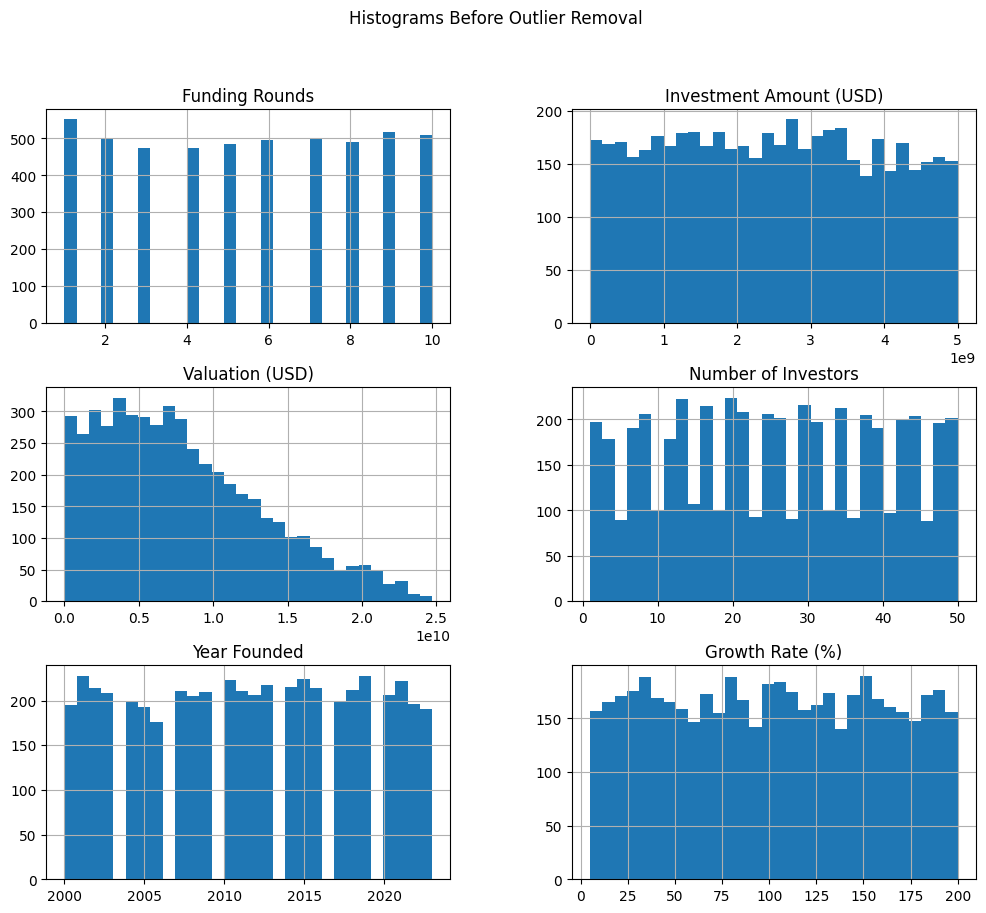

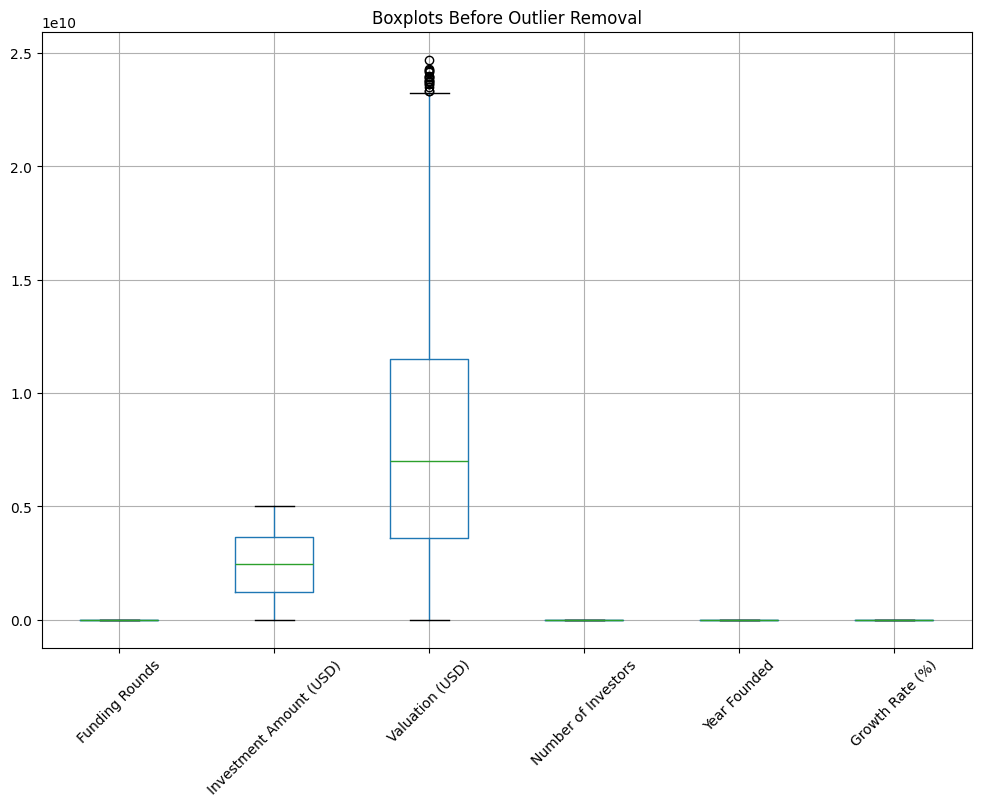

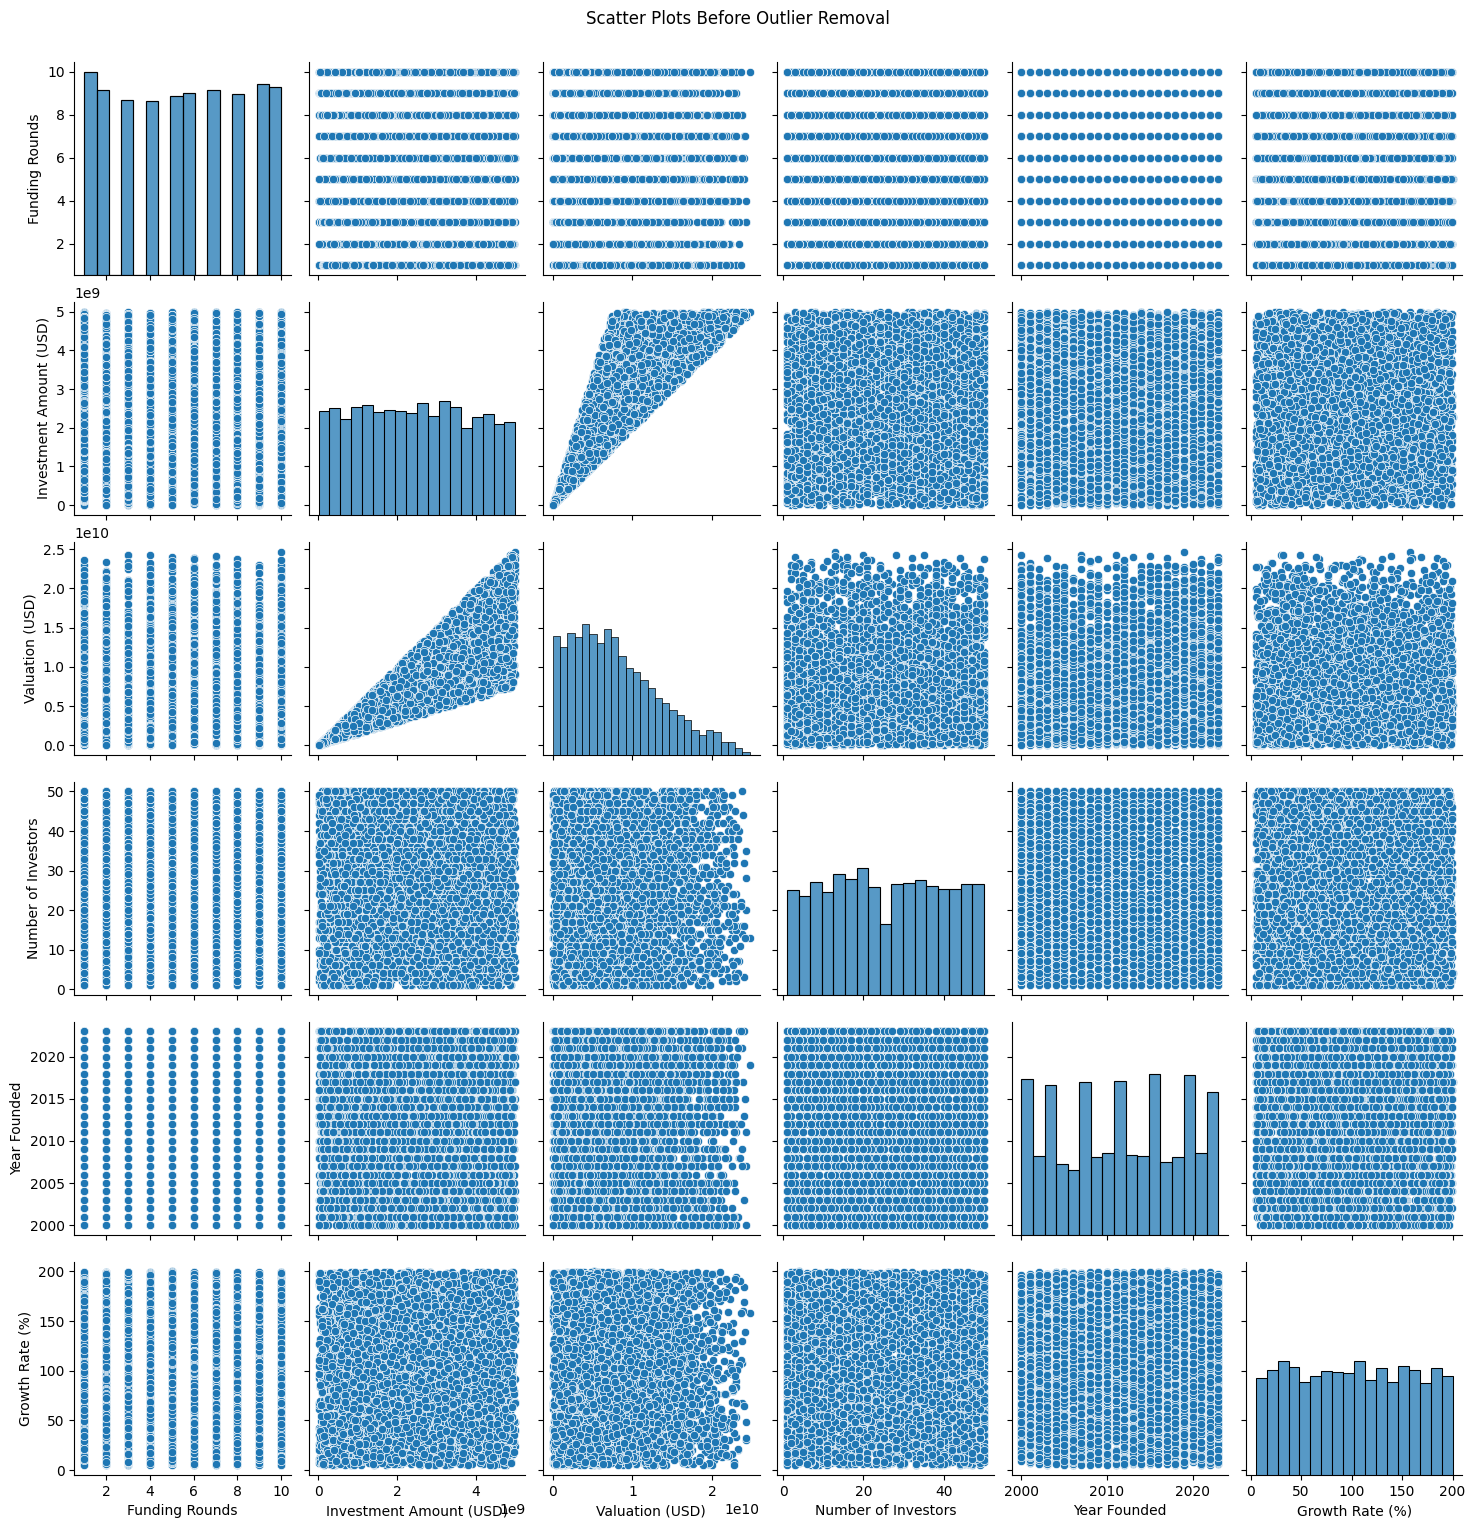

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms Before Outlier Removal")
plt.show()

# Plot boxplots
plt.figure(figsize=(12, 8))
df[num_cols].boxplot()
plt.title("Boxplots Before Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Plot scatter plots
sns.pairplot(df[num_cols])
plt.suptitle("Scatter Plots Before Outlier Removal", y=1.02)
plt.show()


In [ ]:
import numpy as np

def remove_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers
df_cleaned = remove_outliers(df, num_cols)

# Display shape before and after removing outliers
print("Original Data Shape:", df.shape)
print("Cleaned Data Shape:", df_cleaned.shape)


Original Data Shape: (5000, 5021)
Cleaned Data Shape: (4983, 5021)


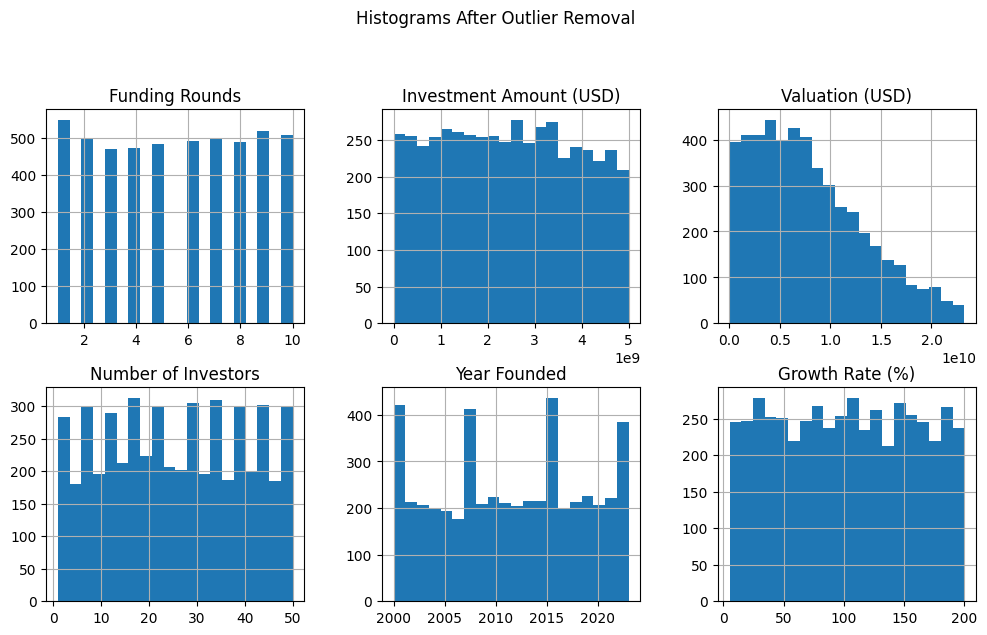

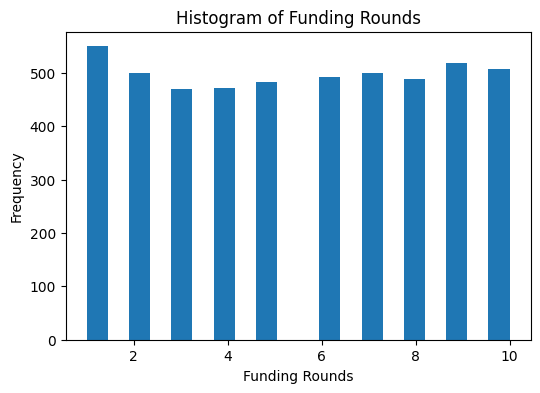

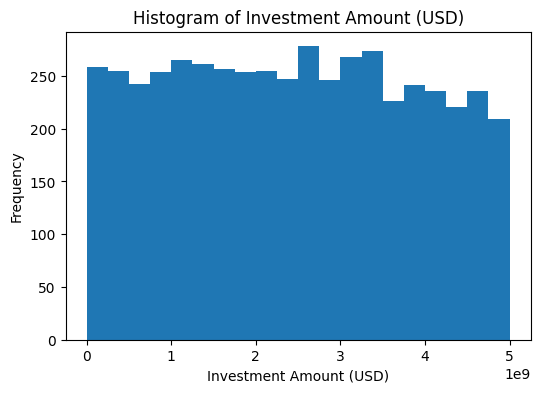

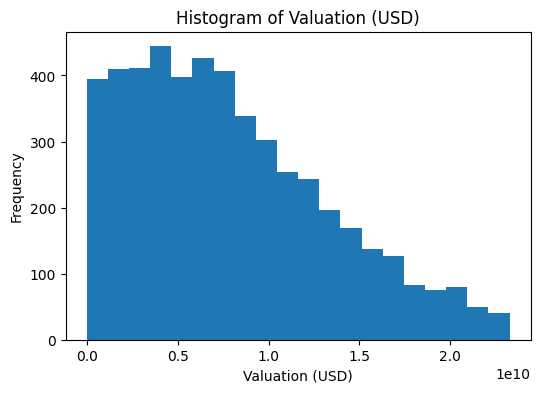

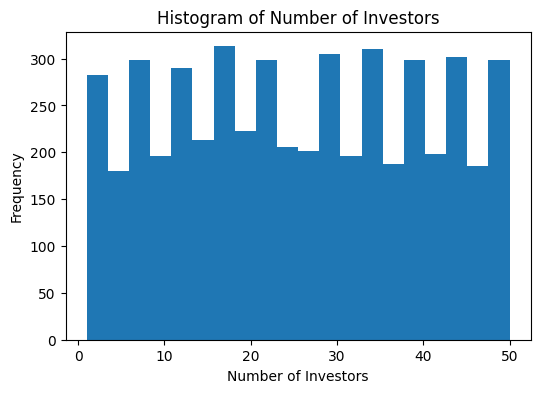

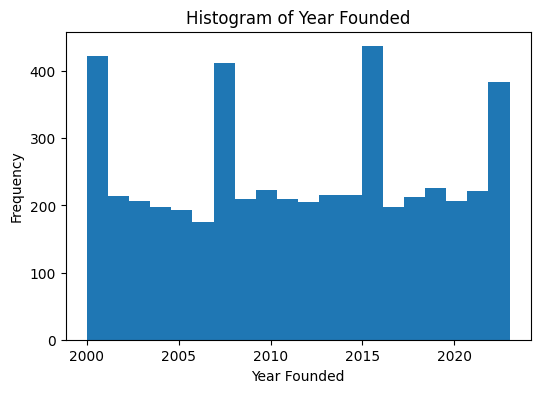

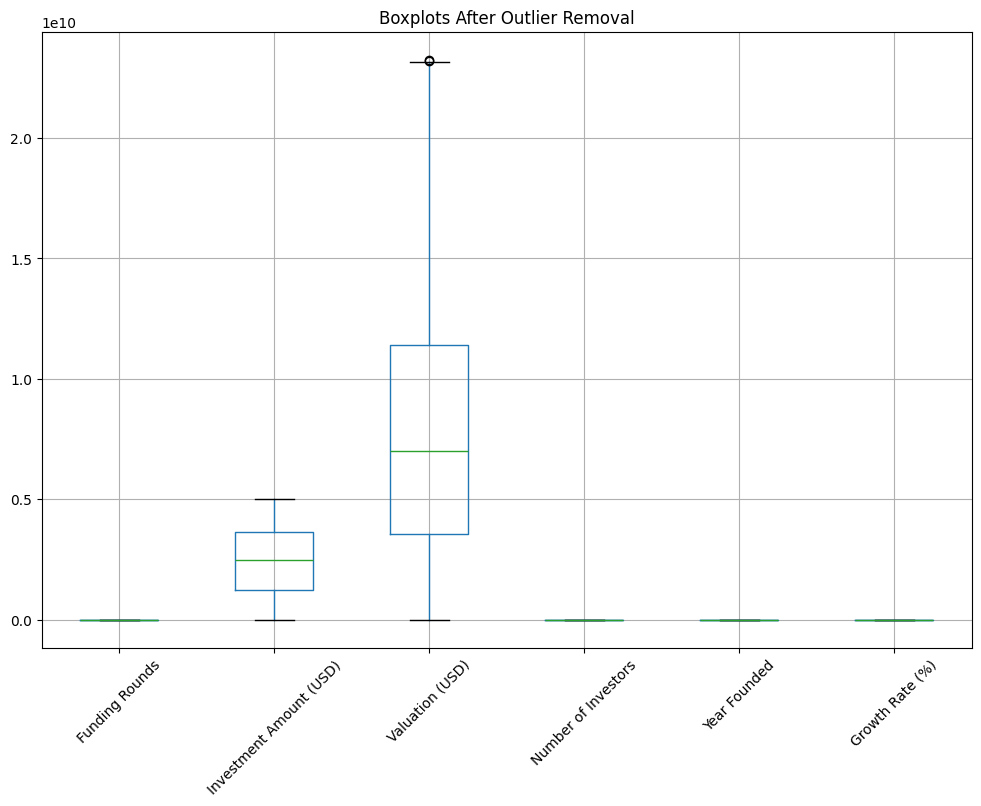

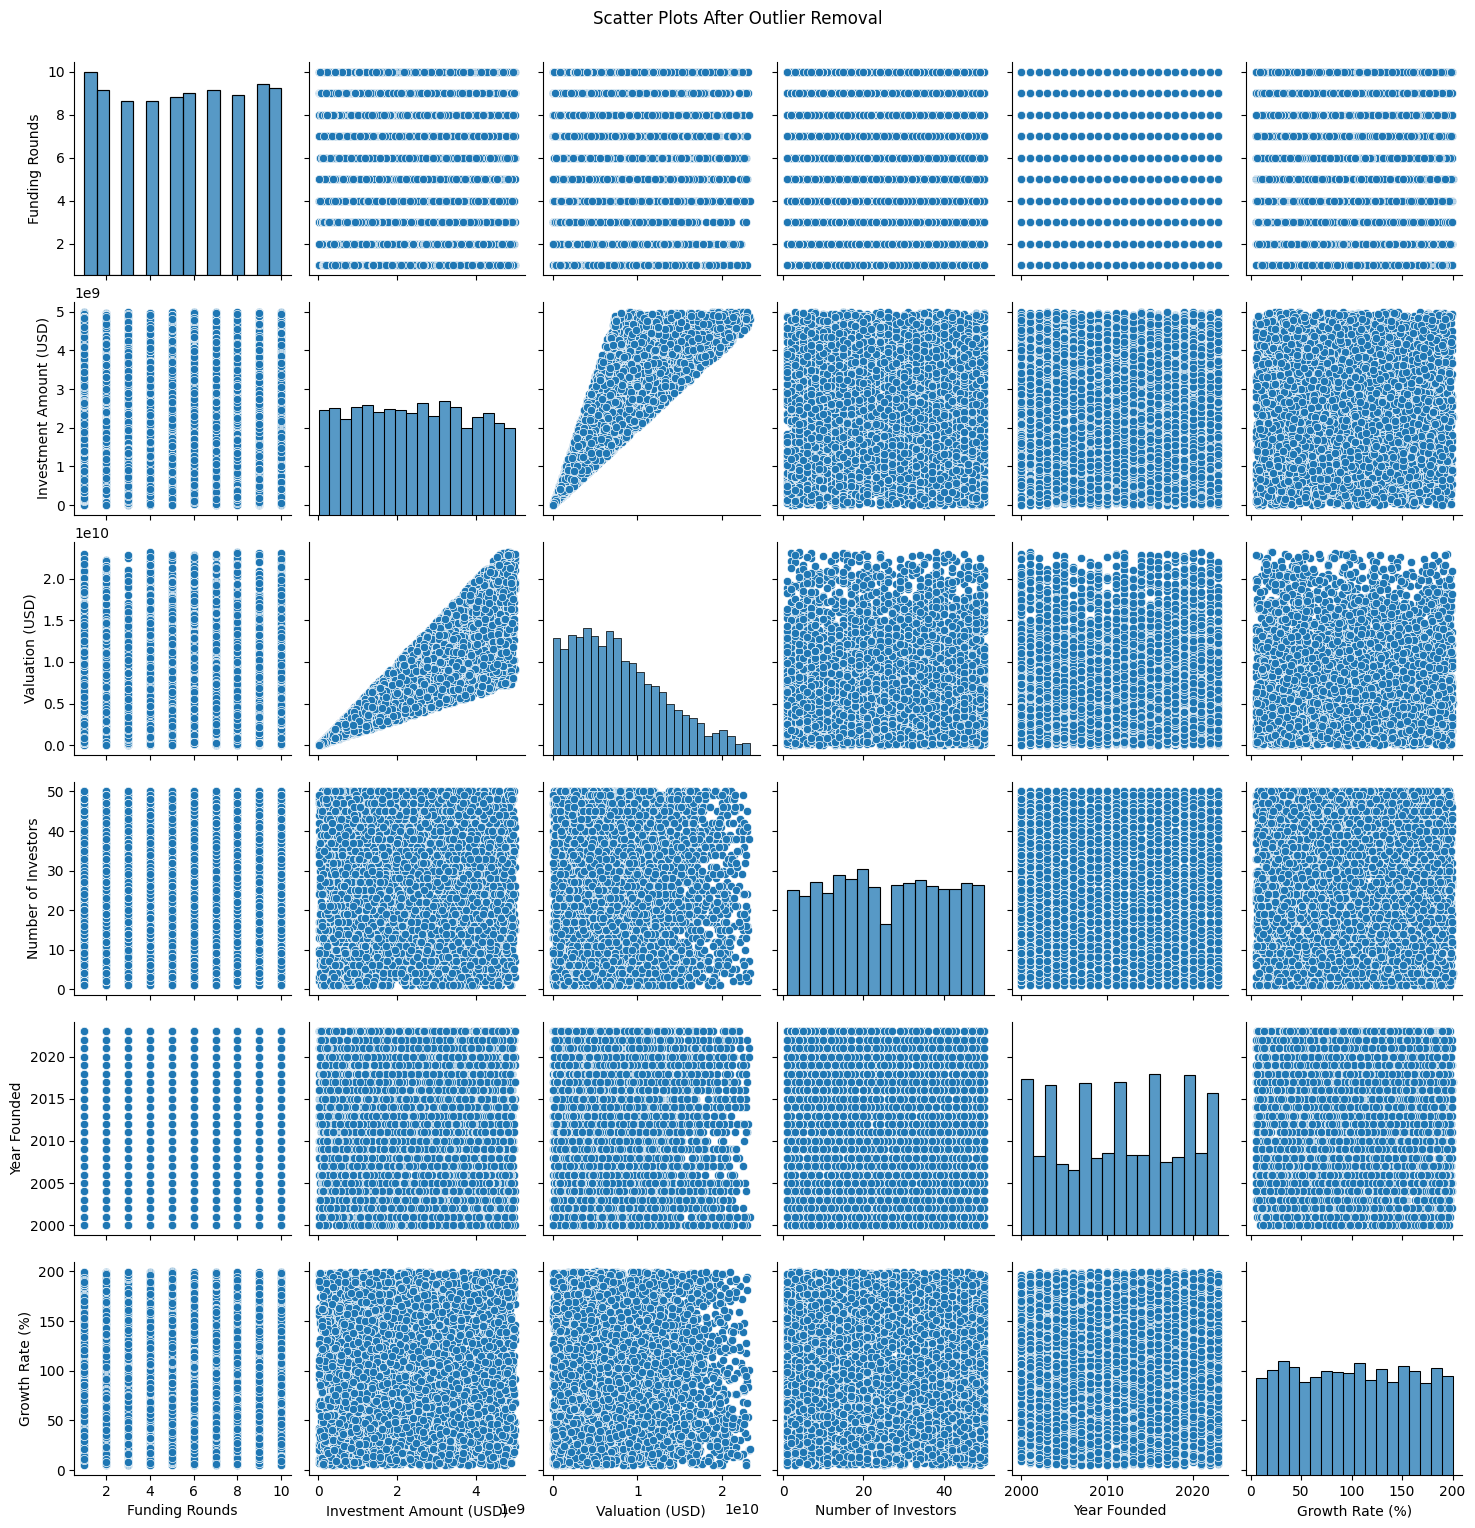

In [ ]:
import matplotlib.pyplot as plt

# Limit the number of bins and adjust layout for better visualization
df_cleaned[num_cols].hist(figsize=(12, 10), bins=20, layout=(3, 3))
plt.suptitle("Histograms After Outlier Removal")
plt.show()

# Alternative: Plot individual histograms (useful for large datasets)
for col in num_cols[:5]:  # Limit to 5 columns for testing
    plt.figure(figsize=(6, 4))
    df_cleaned[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

# Plot boxplots
plt.figure(figsize=(12, 8))
df_cleaned[num_cols].boxplot()
plt.title("Boxplots After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Plot scatter plots
sns.pairplot(df_cleaned[num_cols])
plt.suptitle("Scatter Plots After Outlier Removal", y=1.02)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define features and target
X = df_cleaned.drop(columns=['Growth Rate (%)'])  # Change 'Target_Column' to actual target column
y = df_cleaned['Growth Rate (%)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Random Forest trained successfully.
Support Vector Regression trained successfully.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate models
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                                 MAE          MSE       RMSE  R2 Score
Linear Regression          48.867201  3149.710191  56.122279 -0.004998
Random Forest              50.002927  3350.812287  57.886201 -0.069165
Support Vector Regression  48.792194  3137.325803  56.011836 -0.001047


In [ ]:
from scipy.stats import skew, kurtosis

for col in num_cols:
    print(f"{col}: Skewness = {skew(df_cleaned[col])}, Kurtosis = {kurtosis(df_cleaned[col])}")


Funding Rounds: Skewness = -0.014027325886426805, Kurtosis = -1.2504195466947512
Investment Amount (USD): Skewness = 0.03188061548616885, Kurtosis = -1.1636149587312772
Valuation (USD): Skewness = 0.6621231193180283, Kurtosis = -0.27802583508650436
Number of Investors: Skewness = 0.011266523315210683, Kurtosis = -1.1748433676413148
Year Founded: Skewness = -0.02879803898810232, Kurtosis = -1.1945759493426593
Growth Rate (%): Skewness = 0.011037088686488979, Kurtosis = -1.1966185684051835


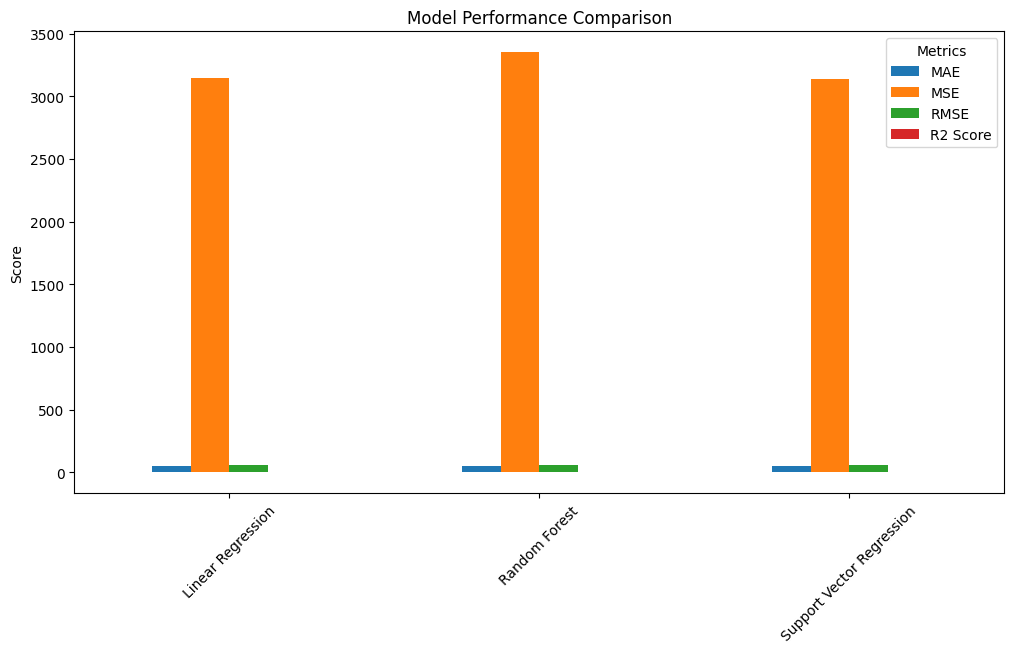

In [ ]:
# Convert results into dataframe
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']
comparison_df = pd.DataFrame(results).T

# Plot bar charts for model comparison
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(title="Metrics")
plt.show()
